In [2]:
%matplotlib inline 

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os 

#import CSV
graduate_csv = "graduate_earnings_all.csv"

graduate_df = pd.read_csv(graduate_csv)

In [3]:
reduced_graduate_df = graduate_df.loc[(reduced_graduate_df["p25_earnings"] > 0)]
reduced_graduate_df.head(5)

NameError: name 'reduced_graduate_df' is not defined

In [ ]:
#Create new DF with columns needed for analysis
reduced_graduate_df = graduate_df.loc[:, ["institution_name", "deglevl", "ciptitle","grad_cohort", "grad_cohort_label", "year_postgrad", "p25_earnings", "p50_earnings", "p75_earnings", "state"]]
reduced_graduate_df.head()

In [ ]:
#Check for null values
reduced_graduate_df.isnull().any()

In [ ]:
#Rename columns
clean_df = reduced_graduate_df.rename(index=str, columns={"institution_name": "College/University", "deglevl": "Degree", "ciptitle": "Program", "grad_cohort": "Cohort", "year_postgrad": "Years Post Grad", "p25_earnings": "25th Percentile Earnings", "p50_earnings": "50th Percentile Earnings", "p75_earnings": "75th Percentile Earnings", "state": "State"})

In [ ]:
#Add Average Earnings column to simplify earnings analysis
clean_df['Average Earnings'] = clean_df[["25th Percentile Earnings", "50th Percentile Earnings", "75th Percentile Earnings"]].apply(np.mean, axis=1)
clean_df.loc[:,"Average Earnings"] = clean_df["Average Earnings"].astype(float).map("${:,.2f}".format)
clean_df.head()


#Final clean DF
new_clean_df = clean_df.loc[:, ["State", "College/University", "Program", "Degree", "Cohort", "Years Post Grad", "Average Earnings"]]
new_clean_df.head(6)

In [ ]:
#We are only analyzing the data for Bachelor, Masters, and Doctorates degrees
#Filtered by Bachelors
bachelor_df = new_clean_df.loc[(new_clean_df["Degree"]=="Baccalaureate")]
bachelor_df.head(6)

In [ ]:
#Highest Average Earnings Bachelor Degrees in TX
tx_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="TX")]
tx_bachelor_df.head(6)

In [4]:
#Highest Average Earnings Bachelor Degrees in CO
co_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="CO")]
co_bachelor_df.head(6)

NameError: name 'bachelor_df' is not defined

In [5]:
#Filtered by Masters
masters_df = new_clean_df.loc[(new_clean_df["Degree"]=="Masters")]
masters_df.head(6)

NameError: name 'new_clean_df' is not defined

In [6]:
#Highest Average Earnings Masters Degrees in TX
tx_masters_df = masters_df.loc[(new_clean_df["State"]=="TX")]
tx_masters_df.head(6)

NameError: name 'masters_df' is not defined

In [7]:
#Highest Average Earnings Masters Degrees in CO
co_masters_df = masters_df.loc[(new_clean_df["State"]=="CO")]
co_masters_df.head(6)

NameError: name 'masters_df' is not defined

In [8]:
#Filtered by Doctoral Degrees
doctoral_df = new_clean_df.loc[(new_clean_df["Degree"].str.contains("Doctoral"))]
doctoral_df.head(6)

NameError: name 'new_clean_df' is not defined

In [9]:
#Highest Average Earnings Doctoral Degrees in TX
tx_doctoral_df = doctoral_df.loc[(new_clean_df["State"]=="TX")]
tx_doctoral_df.head(6)

NameError: name 'doctoral_df' is not defined

In [10]:
#Highest Average Earnings Doctoral Degrees in CO
co_doctoral_df = doctoral_df.loc[(new_clean_df["State"]=="CO")]
co_doctoral_df.head(6)

NameError: name 'doctoral_df' is not defined

In [11]:
#Highest Average Earnings Bachelor Degrees in TX
tx_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="TX")]
tx_bachelor_df.head(6)

NameError: name 'bachelor_df' is not defined

In [12]:
tx_bachelor2_df = tx_bachelor_df.sort_values("Average Earnings", ascending=False)
tx_bachelor2_df

NameError: name 'tx_bachelor_df' is not defined

In [13]:
tx_bachelor_df = tx_bachelor_df.sort_values(["Program", "Average Earnings"], ascending=True)
tx_bachelor_df.head()

NameError: name 'tx_bachelor_df' is not defined

In [14]:
#average earnings for percentile for cohorts (all subjects)

import csv
def makedic(filename):
	f = open(filename, "r")
	reader = csv.reader(f)
	newl = []
	for i in reader:
		line = i
		dic = {}
		dic['id'] = line[0]
		dic['school'] = line[1]
		dic['degree'] = line[3]
		dic['cohort'] = line[6]
		dic['p25'] = line[9]
		dic['p50'] = line[10]
		dic['p75'] = line[11]
		newl.append(dic)
	return newl

def aveCohort(l):
	dic = {}
	for i in l:
		if i['cohort'] in dic.keys():
			try:
				newl = dic[i['cohort']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['cohort']] = newl
			except:
				pass
	for i in dic.keys():
		print("cohort: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
	return dic
	

def main():
	filename = 'graduate_earnings_all.csv'
	data = makedic(filename)
	aveCohort(data)
	
main()



cohort: 1996
the average salary at 25 is:41885.98395721925
the average salary at 50 is:57129.71122994652
the average salary at 75 is:76580.4367201426



cohort: 2001
the average salary at 25 is:40580.36921494686
the average salary at 50 is:54823.0301679808
the average salary at 75 is:73048.87624271512



cohort: 2006
the average salary at 25 is:39247.3883029722
the average salary at 50 is:53216.663470757434
the average salary at 75 is:70989.57430488974



cohort: 2011
the average salary at 25 is:34119.80173913044
the average salary at 50 is:46387.56695652174
the average salary at 75 is:61970.51130434783



cohort: 2004
the average salary at 25 is:38221.85865257596
the average salary at 50 is:51141.637384412155
the average salary at 75 is:67117.81902245707



cohort: 1998
the average salary at 25 is:38404.89638157895
the average salary at 50 is:52381.13651315789
the average salary at 75 is:69474.74835526316



cohort: 2007
the average salary at 25 is:34009.92230347349
the average salary

In [15]:
import csv
def makedic(filename):
	f = open(filename, "r")
	reader = csv.reader(f)
	newl = []
	for i in reader:
		line = i
		dic = {}
		dic['id'] = line[0]
		dic['school'] = line[1]
		dic['degree'] = line[3]
		dic['cohort'] = line[6]
		dic['p25'] = line[9]
		dic['p50'] = line[10]
		dic['p75'] = line[11]
		newl.append(dic)
	return newl

def aveCohort(l):
	dic = {}
	for i in l:
		if i['cohort'] in dic.keys():
			try:
				newl = dic[i['cohort']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['cohort']] = newl
			except:
				pass
	for i in dic.keys():
		print("cohort: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
	return dic

def aveDegree(l):
	dic = {}
	for i in l:
		if i['degree'] in dic.keys():
			try:
				newl = dic[i['degree']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['degree']] = newl
			except:
				pass
	for i in dic.keys():
		print("-----------------")
		print("degree: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
		print("\n~COHORT BREAKDOWN:\n")
		aveCohort(isoDegree(l, i))
		print("-----------------")

	return dic

def isoSchool(l, school):
	newl = []
	for i in l:
		if i['id'] == school:
			newl.append(i)
	return newl

def isoDegree(l, degree):
	newl = []
	for i in l:
		if i['degree'] == degree:
			newl.append(i)
	return newl


def getschools(l):
	dic = {}
	for i in l:
		if i['id'] in dic.keys():
			pass
		else:
			dic[i['id']] = i['school']
	return dic

def order(l):
	for i in getschools(l).keys():
		print("===============")
		print("data for: " + getschools(l)[i])
		print("\n~DEGREE BREAKDOWN!:\n")
		aveDegree(isoSchool(l, i))
		print("===============")
		
		
	

def main():
	filename = 'graduate_earnings_all.csv'
	data = makedic(filename)
	order(data)
	
	
main()

data for: institution_name

~DEGREE BREAKDOWN!:

data for: ADAMS STATE COLLEGE

~DEGREE BREAKDOWN!:

-----------------
degree: Associates
the average salary at 25 is:23025.875
the average salary at 50 is:31965.375
the average salary at 75 is:46262.75




~COHORT BREAKDOWN:

cohort: 1996
the average salary at 25 is:27549.0
the average salary at 50 is:38099.0
the average salary at 75 is:59226.5



cohort: 2001
the average salary at 25 is:25523.0
the average salary at 50 is:35323.333333333336
the average salary at 75 is:49420.666666666664



cohort: 2006
the average salary at 25 is:18808.5
the average salary at 50 is:26665.0
the average salary at 75 is:38385.5



cohort: 2011
the average salary at 25 is:14923.0
the average salary at 50 is:20225.0
the average salary at 75 is:26616.0



-----------------
-----------------
degree: Baccalaureate
the average salary at 25 is:27869.60606060606
the average salary at 50 is:37432.106060606064
the average salary at 75 is:48917.893939393936




~COHO

the average salary at 50 is:56593.10891089109
the average salary at 75 is:71973.86138613861



cohort: 2007
the average salary at 25 is:39560.52112676056
the average salary at 50 is:51074.32394366197
the average salary at 75 is:64777.80281690141



cohort: 2013
the average salary at 25 is:34642.769230769234
the average salary at 50 is:44941.5641025641
the average salary at 75 is:57415.4358974359



cohort: 2010
the average salary at 25 is:32051.024390243903
the average salary at 50 is:42400.87804878049
the average salary at 75 is:54540.51219512195



-----------------
data for: UNIVERSITY OF TEXAS-SAN ANTONIO

~DEGREE BREAKDOWN!:

-----------------
degree: Doctoral - Research/Scholarship
the average salary at 25 is:58309.875
the average salary at 50 is:81171.25
the average salary at 75 is:98929.375




~COHORT BREAKDOWN:

cohort: 2011
the average salary at 25 is:59587.5
the average salary at 50 is:82274.0
the average salary at 75 is:103329.5



cohort: 2006
the average salary at 25 is:

the average salary at 75 is:48874.40740740741



cohort: 2001
the average salary at 25 is:27728.75
the average salary at 50 is:38421.13888888889
the average salary at 75 is:52692.416666666664



cohort: 2013
the average salary at 25 is:19504.571428571428
the average salary at 50 is:26772.85714285714
the average salary at 75 is:36435.142857142855



cohort: 2010
the average salary at 25 is:18297.666666666668
the average salary at 50 is:24600.88888888889
the average salary at 75 is:34557.88888888889



-----------------
-----------------
degree: Masters
the average salary at 25 is:31072.0
the average salary at 50 is:39074.0
the average salary at 75 is:47530.0




~COHORT BREAKDOWN:

cohort: 2011
the average salary at 25 is:31072.0
the average salary at 50 is:39074.0
the average salary at 75 is:47530.0



-----------------
data for: COLORADO STATE UNIVERSITY - GLOBAL CAMPU

~DEGREE BREAKDOWN!:

-----------------
degree: Masters
the average salary at 25 is:47165.2
the average salary at 50 

-----------------
degree: Certificate,1-2 years
the average salary at 25 is:39612.93939393939
the average salary at 50 is:54823.36363636364
the average salary at 75 is:71907.15151515152




~COHORT BREAKDOWN:

cohort: 2011
the average salary at 25 is:34434.25
the average salary at 50 is:45138.75
the average salary at 75 is:57638.75



cohort: 1996
the average salary at 25 is:37087.333333333336
the average salary at 50 is:55512.0
the average salary at 75 is:73541.33333333333



cohort: 2001
the average salary at 25 is:39902.8125
the average salary at 50 is:54263.1875
the average salary at 75 is:72339.0



cohort: 2006
the average salary at 25 is:49314.75
the average salary at 50 is:65199.25
the average salary at 75 is:80771.25



-----------------
-----------------
degree: Associates
the average salary at 25 is:35403.68656716418
the average salary at 50 is:50224.05970149254
the average salary at 75 is:68613.41791044777




~COHORT BREAKDOWN:

cohort: 1996
the average salary at 25 is:388

In [16]:
bsavg_earnings_csv = "Average Earnings per Institute BS.csv"

bsavg_earnings_df = pd.read_csv(bsavg_earnings_csv)

In [17]:
bsavg_earningsclean_df = bsavg_earnings_df.dropna(how='any')

In [18]:
bsavg_earningsclean_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,84079.83642,BACHELORS
1,UNIV OF TEXAS HEALTH SCIENCE CENTER,71251.80952,BACHELORS
2,UNIV OF TEXAS MEDICAL BRANCH,69421.96875,BACHELORS
3,UT HEALTH CENTER-SAN ANTONIO,65411.98485,BACHELORS
4,UNIV OF TEXAS SOUTHWESTERN MED CTR,63203.93939,BACHELORS
5,UNIV OF TX MD ANDERSON CANCER CTR,62604.27273,BACHELORS
6,UNIVERSITY OF TEXAS-AUSTIN,60645.90947,BACHELORS
7,COLORADO STATE UNIVERSITY - GLOBAL CAMPU,54912.13889,BACHELORS
8,UNIVERSITY OF TEXAS-ARLINGTON,53604.84131,BACHELORS
9,UNIVERSITY OF TEXAS AT DALLAS,52285.57168,BACHELORS


In [19]:
msavg_earnings_csv = "Average Earnings per Institute MS .csv"

msavg_earnings_df = pd.read_csv(msavg_earnings_csv)

In [20]:
msavg_earningsclean_df = msavg_earnings_df.dropna(how='any')

In [21]:
msavg_earningsclean_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,92612.25806,MASTERS
1,UNIV OF TEXAS MEDICAL BRANCH,88053.33333,MASTERS
2,UNIV OF TEXAS HEALTH SCIENCE CENTER,84337.47222,MASTERS
3,UNIV OF TEXAS SOUTHWESTERN MED CTR,80215.16667,MASTERS
4,UT HEALTH CENTER-SAN ANTONIO,76711.55556,MASTERS
5,UNIV OF COLORADO AT COLO SPRINGS,72456.18519,MASTERS
6,UNIVERSITY OF TEXAS-PERMIAN BASIN,72375.25000,MASTERS
7,UNIVERSITY OF TEXAS AT DALLAS,67601.94595,MASTERS
8,UNIVERSITY OF COLORADO DENVER,66772.33333,MASTERS
9,UNIVERSITY OF TEXAS-ARLINGTON,66717.16838,MASTERS


In [22]:
dravg_earnings_csv = "Average Earnings per Institute Doctoral.csv"

dravg_earnings_df = pd.read_csv(dravg_earnings_csv)

In [23]:
dravg_earnings_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,105984.85710,DOCTORAL
1,UT HEALTH CENTER-SAN ANTONIO,105270.88410,DOCTORAL
2,UNIV OF TEXAS HEALTH SCIENCE CENTER,104768.34720,DOCTORAL
3,UNIVERSITY OF TEXAS - PAN AMERICAN,99272.33333,DOCTORAL
4,UNIVERSITY OF COLORADO DENVER,98400.50000,DOCTORAL
5,UNIVERSITY OF TEXAS-ARLINGTON,95491.07246,DOCTORAL
6,UNIV OF TEXAS SOUTHWESTERN MED CTR,93592.44444,DOCTORAL
7,UNIV OF TEXAS MEDICAL BRANCH,93526.72222,DOCTORAL
8,UNIVERSITY OF TEXAS AT DALLAS,92992.30208,DOCTORAL
9,UNIVERSITY OF TEXAS-AUSTIN,90572.86486,DOCTORAL


In [24]:
bsavg_earnings = "Average Earnings per Institute BS.csv"

bsavg_earnings_df = pd.read_csv(bsavg_earnings)
bsavg_earnings_df.dtypes


INSTITUTION          object
AVERAGE EARNINGS    float64
DEGREE               object
dtype: object

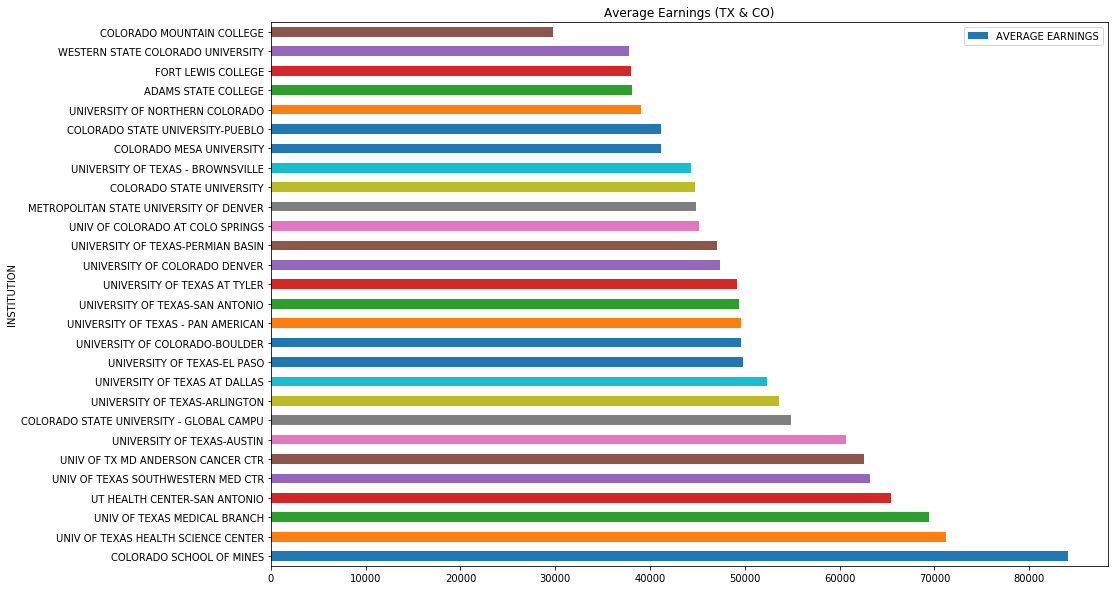

In [43]:
bsavg_earningsclean_df.plot(kind="barh", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

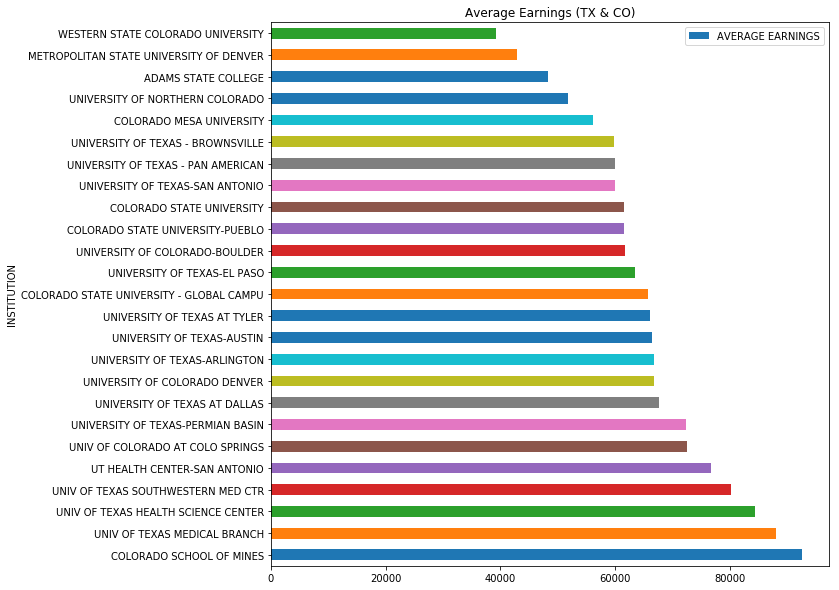

In [44]:
msavg_earningsclean_df.plot(kind="barh", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

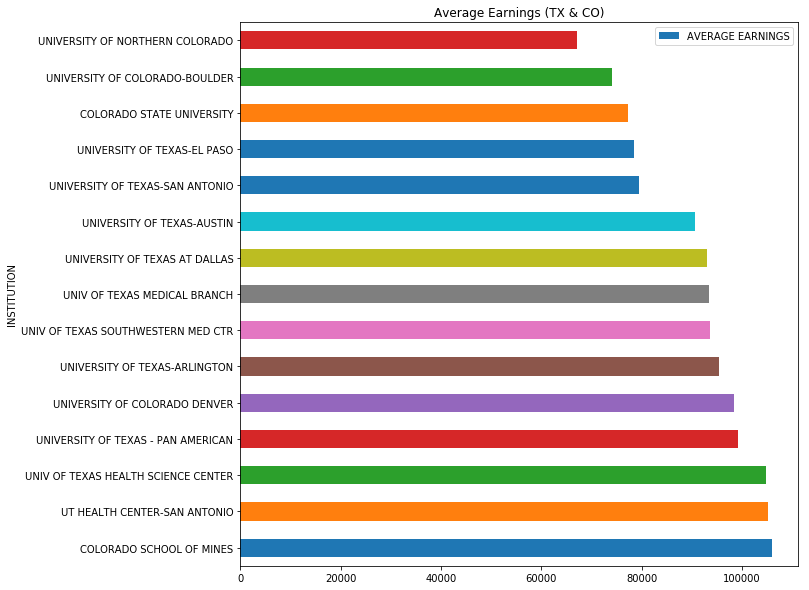

In [46]:
dravg_earnings_df.plot(kind="barh", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.rcParams['figure.figsize'] = [10,10]
plt.show()